In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Read CSV File
df = pd.read_csv ("wages_by_education.csv")
df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [4]:
#Display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

QUESTION 1 - •	Are things trending towards females earning as much as males for those with an advanced degree?

QUESITON 2 - •	Does the increase in education affect the increase in salary for both men and women equally?

In [20]:
# Calculate the average hourly wage for 1973-2022 grouped by gender and education level
ave_salary = {'Education Level': ['Less Than High School', 'High School', 'Some College ', 'Bachelors Degree', 'Advanced Degree'],
              'Men': [df['men_less_than_hs'].mean(), df['men_high_school'].mean(), df['men_some_college'].mean(), 
                      df['men_bachelors_degree'].mean(), df['men_advanced_degree'].mean()],
              'Women': [df['women_less_than_hs'].mean(), df['women_high_school'].mean(), df['women_some_college'].mean(), 
                      df['women_bachelors_degree'].mean(), df['women_advanced_degree'].mean()],              
              }

ave_salary_df = pd.DataFrame(ave_salary)
ave_salary_df

,Education Level,Men,Women
0,Less Than High School,17.5652,12.8514
1,High School,23.8326,17.5716
2,Some College,26.3338,19.9432
3,Bachelors Degree,39.9884,28.9264
4,Advanced Degree,49.4302,36.9752


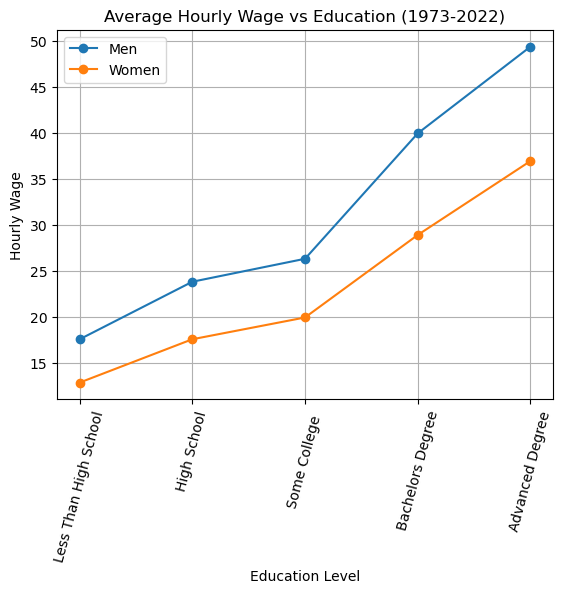

In [16]:

# Create line graph showing average hourly wage by gender and education level
fig, ax = plt.subplots()

# Plotting the lines on the axes
ax.plot(ave_salary_df["Education Level"], ave_salary_df['Men'], marker='o', label='Men')
ax.plot(ave_salary_df["Education Level"], ave_salary_df['Women'], marker='o', label='Women')


# Customize the plot
ax.set_xlabel('Education Level')
ax.set_ylabel('Hourly Wage')
ax.set_title('Average Hourly Wage vs Education (1973-2022)')
plt.xticks(rotation=75)
ax.legend()
ax.grid(True)

plt.show()

In [21]:
#Calculate rate of change of hourly rate for each year grouped by gender and education level.
change_df = pd.DataFrame()
change_df['year']=df['year']

change_df['rate_change_hs_men']= (df['men_high_school']-df['men_less_than_hs'])/df['men_less_than_hs']*100
change_df['rate_change_hs_women']= (df['women_high_school']-df['women_less_than_hs'])/df['women_less_than_hs']*100
change_df['rate_change_bachelors_men']= (df['men_bachelors_degree']-df['men_high_school'])/df['men_high_school']*100
change_df['rate_change_bachelors_women']= (df['women_bachelors_degree']-df['women_high_school'])/df['women_high_school']*100
change_df.head()




,year,rate_change_hs_men,rate_change_hs_women,rate_change_bachelors_men,rate_change_bachelors_women
0,2022,33.852140,32.100488,103.529900,81.669308
1,2021,32.824427,34.818942,96.346470,81.198347
2,2020,33.742004,34.375000,91.909127,82.997416
3,2019,36.695157,32.378223,90.662776,82.900433
4,2018,34.011299,38.398204,89.586847,78.637101


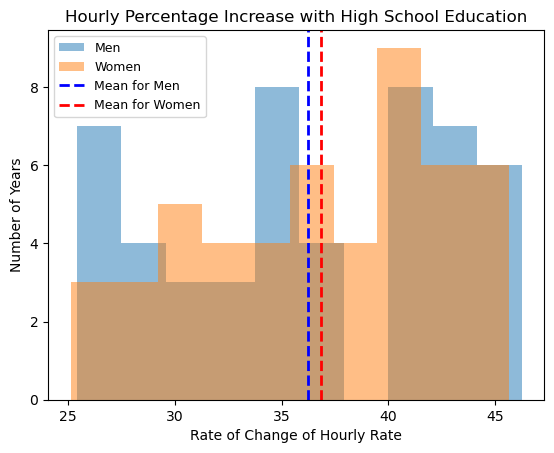

The mean falue for men = 36.21546624652191
The mean falue for women = 36.823847090506625
p-value: 0.620632068753353


: 

In [29]:
# Histogram plot showing the rate of change in hourly salary with a high school deploma grouped by gender 
plt.hist(change_df['rate_change_hs_men'],  alpha=0.5, label='Men')
plt.hist(change_df['rate_change_hs_women'], alpha=0.5, label='Women')

# Calculate the mean
mean_value_m = np.mean(change_df['rate_change_hs_men'])
mean_value_w = np.mean(change_df['rate_change_hs_women'])

# Plot the mean as a vertical line on the histogram
plt.axvline(mean_value_m, color='blue', linestyle='dashed', linewidth=2, label='Mean for Men')
plt.axvline(mean_value_w, color='red', linestyle='dashed', linewidth=2, label='Mean for Women')
plt.legend(loc='upper left', prop={'size': 9})
plt.xlabel('Rate of Change of Hourly Rate')
plt.ylabel('Number of Years')

plt.title('Hourly Percentage Increase with High School Education')
plt.show()

# print off the mean values for the rate change
print(f'The mean falue for men = {mean_value_m}')
print(f'The mean falue for women = {mean_value_w}')

from scipy.stats import ttest_ind

# Perform two-sample t-test men vs women
t_statistic, p_value = ttest_ind(change_df['rate_change_hs_men'], change_df['rate_change_hs_women'])
print(f'p-value: {p_value}')


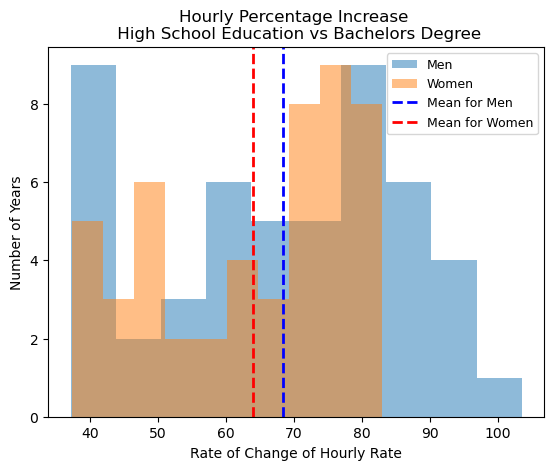

The mean falue for men = 68.34786140406185
The mean falue for women = 64.04608412308932
p-value: 0.19967304397146746


In [28]:
# Histogram plot showing the rate of change in hourly salary with a Bachelors Degree grouped by gender 
plt.hist(change_df['rate_change_bachelors_men'],  alpha=0.5, label='Men')
plt.hist(change_df['rate_change_bachelors_women'], alpha=0.5, label='Women')

# Calculate the mean
mean_value_m = np.mean(change_df['rate_change_bachelors_men'])
mean_value_w = np.mean(change_df['rate_change_bachelors_women'])

# Plot the mean as a vertical line on the histogram
plt.axvline(mean_value_m, color='blue', linestyle='dashed', linewidth=2, label='Mean for Men')
plt.axvline(mean_value_w, color='red', linestyle='dashed', linewidth=2, label='Mean for Women')
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel('Rate of Change of Hourly Rate')
plt.ylabel('Number of Years')

plt.title('Hourly Percentage Increase \n High School Education vs Bachelors Degree')
plt.show()

# print off the mean values for the rate change
print(f'The mean falue for men = {mean_value_m}')
print(f'The mean falue for women = {mean_value_w}')


# Perform two-sample t-test men vs women
t_statistic, p_value = ttest_ind(change_df['rate_change_bachelors_men'], change_df['rate_change_bachelors_women'])
print(f'p-value: {p_value}')


QUESTION 3 - •	For those with an advanced degree, is there a difference between one of the groups based on race for the last 5 years?

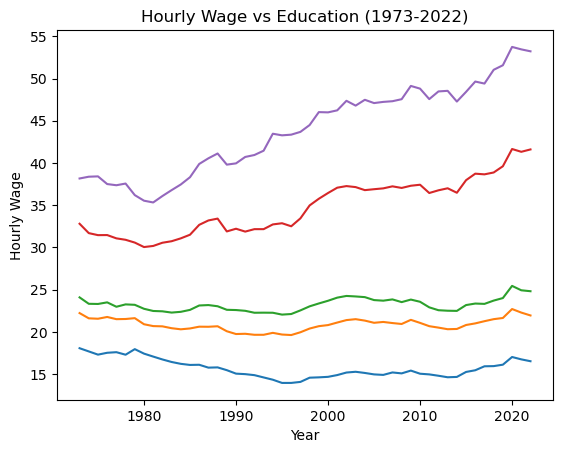

In [6]:

# Line Plot information
fig, ax = plt.subplots()
ax.plot(df['year'],df['less_than_hs'])
ax.plot(df['year'],df['high_school'])
ax.plot(df['year'],df['some_college'])
ax.plot(df['year'],df['bachelors_degree'])
ax.plot(df['year'],df['advanced_degree'])

# Graph Labels
ax.set_xlabel('Year')
ax.set_ylabel('Hourly Wage')
ax.set_title("Hourly Wage vs Education (1973-2022)")
plt.show()

In [28]:
#Only look at last 5 years
last_five = df[df['year']>=2018]

# Bring in only columns with word advanced
adv_degree_last = last_five.filter(like="advanced")

# Drop the first column that includes everyone with an advanced degree
adv_degree_last = adv_degree_last.drop(columns='advanced_degree')
adv_degree_last

,men_advanced_degree,women_advanced_degree,white_advanced_degree,black_advanced_degree,hispanic_advanced_degree,white_men_advanced_degree,black_men_advanced_degree,hispanic_men_advanced_degree,white_women_advanced_degree,black_women_advanced_degree,hispanic_women_advanced_degree
0,63.51,44.34,53.30,44.67,48.30,63.86,52.91,57.08,44.45,39.41,40.64
1,63.52,44.80,53.62,43.37,48.60,64.04,49.01,55.60,44.82,40.07,42.47
2,62.70,46.04,53.80,45.76,48.58,63.50,51.67,53.58,45.58,42.44,44.15
3,59.93,44.22,51.81,42.73,46.69,60.84,46.87,52.24,43.83,40.42,42.30
4,59.73,43.19,51.80,42.22,44.83,61.27,46.42,51.27,43.31,39.64,39.35
